### Testing out PIL image library with torchvision for working with the images from the folder
This notebook tests loading of the data from the dataset and using that data to train a deep learning model

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import math
import matplotlib.pyplot as plt
import numpy as np
from alien_dataset import AlienDataset, clean_ben10label_name
from aliendataset_transforms import cleaning_and_randomization_transforms


now that we have imported the required libraries, we can now load the dataset with the dataloaders and test visualizing them with pytorch

In [2]:
full_dataset = AlienDataset(
    root_dir="/Users/kosisochukwuasuzu/Developer/alienclassifier/results",
    transform=cleaning_and_randomization_transforms,
    clean_label_name=clean_ben10label_name
)

Loaded 608 images from 10 classes
Classes: [' ghostfreak', ' greymatter', ' ripjaws', ' diamondhead', ' fourarms', ' heatblast', ' stinkfly', ' upgrade', ' wildmutt', ' xlr8']


In [3]:
total_size = len(full_dataset)
print(f"**** total number of images in the dataset: {total_size} ****")

train_size = int(math.floor(0.7 * total_size))
print(f"**** train size: {train_size} ****")
val_size = int(math.floor(0.1 * total_size))
print(f"**** val size: {val_size} ****")
test_size = int(math.floor(0.2 * total_size))
print(f"**** test size: {test_size} ****")

remainder = (total_size) - (train_size + val_size + test_size)
print(f"**** remainder: {remainder} ****")
train_size = train_size + remainder
print(f"**** train size: {train_size} ****")

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

**** total number of images in the dataset: 608 ****
**** train size: 425 ****
**** val size: 60 ****
**** test size: 121 ****
**** remainder: 2 ****
**** train size: 427 ****


In [4]:
full_dataset.classes

[' ghostfreak',
 ' greymatter',
 ' ripjaws',
 ' diamondhead',
 ' fourarms',
 ' heatblast',
 ' stinkfly',
 ' upgrade',
 ' wildmutt',
 ' xlr8']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2146587].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1345534].


torch.Size([3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([3, 128, 128])


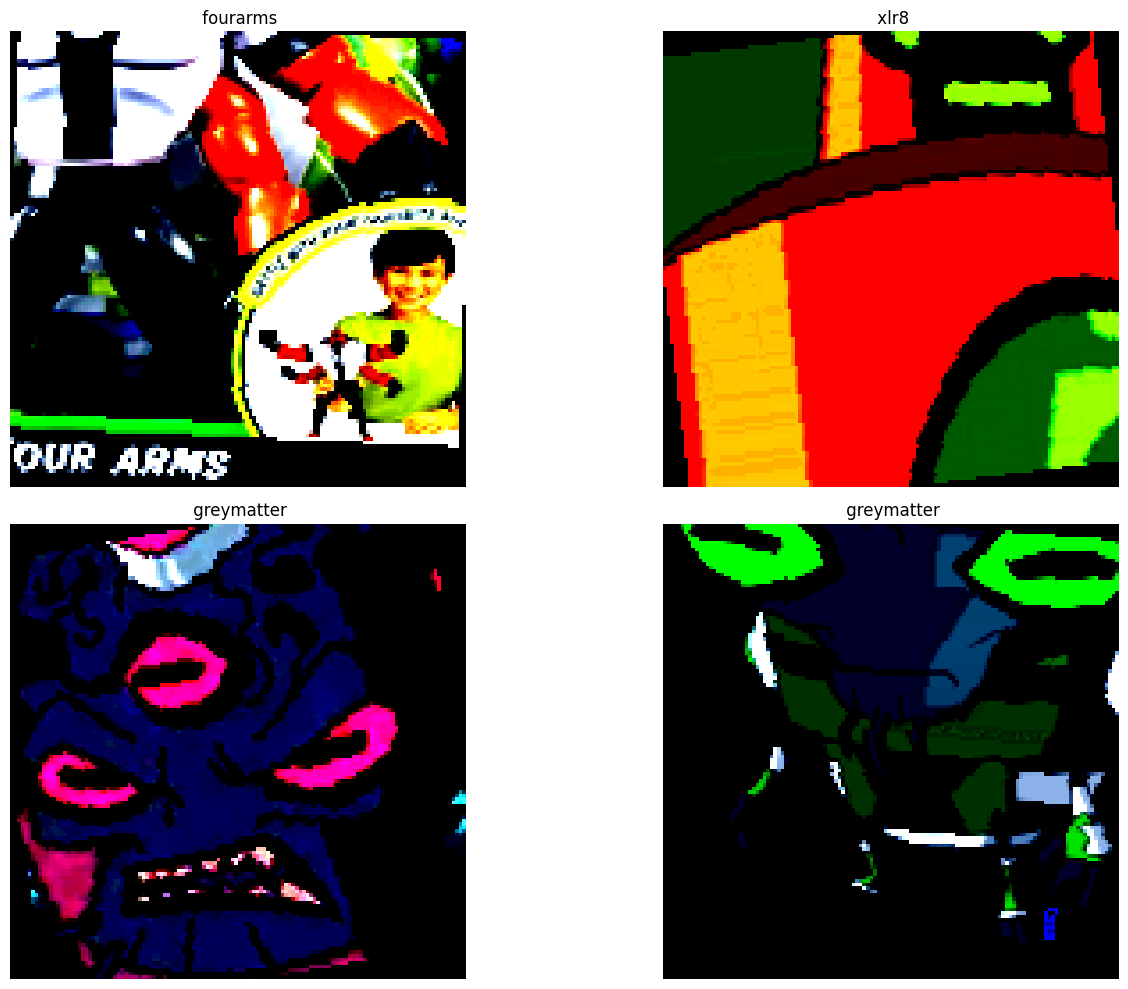

In [7]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# visualize the first 10 images in the dataset
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    print(train_dataset[i][0].shape)
    plt.imshow(train_dataset[i][0].permute(1, 2, 0))
    plt.title(full_dataset.classes[train_dataset[i][1]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
images, labels = next(iter(train_loader))
print(f"**** images shape: {images.shape} ****")
print(f"**** labels shape: {labels.shape} ****")

# name dimensions for easier mental mapping
batch_dimension, channel_dimension, height_dimension, width_dimension = 0, 1, 2, 3
batch_dimension_size, channel_dimension_size, height_dimension_size, width_dimension_size = images.shape

print(f"**** batch dimension is {batch_dimension} and its size is {batch_dimension_size} ****")
print(f"**** channel dimension is {channel_dimension} and its size is {channel_dimension_size} ****")
print(f"**** height dimension is {height_dimension} and its size is {height_dimension_size} ****")
print(f"**** width dimension is {width_dimension} and its size is {width_dimension_size} ****")



**** images shape: torch.Size([16, 3, 128, 128]) ****
**** labels shape: torch.Size([16]) ****
**** batch dimension is 0 and its size is 16 ****
**** channel dimension is 1 and its size is 3 ****
**** height dimension is 2 and its size is 128 ****
**** width dimension is 3 and its size is 128 ****
